In [94]:
import pandas as pd

fraud_df = pd.read_csv('data/df_fraud_real.csv', index_col=False)
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4182 non-null   int64 
 1   Unnamed: 0      4182 non-null   int64 
 2   판례일련번호          4182 non-null   int64 
 3   사건명             4180 non-null   object
 4   사건번호            4182 non-null   object
 5   선고일자            4182 non-null   object
 6   법원명             4182 non-null   object
 7   사건종류명           4182 non-null   object
 8   판례상세링크          4182 non-null   object
 9   판례정보일련번호        4182 non-null   int64 
 10  선고              4182 non-null   object
 11  판결유형            4182 non-null   object
 12  판시사항            3028 non-null   object
 13  판결요지            2482 non-null   object
 14  참조조문            3001 non-null   object
 15  참조판례            1808 non-null   object
 16  판례내용            4182 non-null   object
 17  판례내용_상단         4182 non-null   object
 18  판례내용_이유 

In [95]:
fraud_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [97]:
fraud_df.fillna({'판례내용_이유(불용어제거)':''},inplace=True)
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   판례일련번호          4182 non-null   int64 
 1   사건명             4180 non-null   object
 2   사건번호            4182 non-null   object
 3   선고일자            4182 non-null   object
 4   법원명             4182 non-null   object
 5   사건종류명           4182 non-null   object
 6   판례상세링크          4182 non-null   object
 7   판례정보일련번호        4182 non-null   int64 
 8   선고              4182 non-null   object
 9   판결유형            4182 non-null   object
 10  판시사항            3028 non-null   object
 11  판결요지            2482 non-null   object
 12  참조조문            3001 non-null   object
 13  참조판례            1808 non-null   object
 14  판례내용            4182 non-null   object
 15  판례내용_상단         4182 non-null   object
 16  판례내용_이유         4178 non-null   object
 17  판례내용_이유(전처리)    4182 non-null   object
 18  판례내용_이유(

In [98]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 불용어 파일 로드
stopwords_file_path = 'data/sorted_words_20241022.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1',
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외','하기로', 
                  '이를', '의하여', '받은', '있는','이고', '있고', '없는', '없으므로', 
                  '살펴보면', '있어', '지는', '있다고', '에는', '라고', '인한',
                  '의하면', '하게', '하였고', '아니한', '정당하고', '에도', '으로부터', '이라고',
                  '하여','】【', '않으므로','이라','한다','하여','없었음에도','있는것인데','되였음',
                  '하였으나','하였다고','하였다는','받아','되지','없다고','판시와']
pattern = r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# remove_stopwords 함수 수정
def remove_stopwords(phrase):
    if not isinstance(phrase, str):  # 입력이 문자열이 아닌 경우 빈 문자열 반환
        return ''
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(phrase)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)  # 패턴에 매칭되면 제외
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

def remove_digits_and_letters(text):
    # 000, ooo, OOO 반복 제거 및 알파벳과 숫자 조합 제거
    text = re.sub(r'(000|ooo|OOO)+', '', text)  # 반복되는 패턴 제거
    text = re.sub(r'\d+[가-힣]+', '', text)  # 숫자와 알파벳 조합 제거
    return text

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
fraud_df['판례내용_이유(불용어제거)'] = fraud_df['판례내용_이유'].apply(remove_stopwords).apply(remove_digits_and_letters)

# 결과 확인
print(fraud_df['판례내용_이유(불용어제거)'])

0       판시 일람표 서부 발부 압수 수색 검증 영장 영장 기하 압수 저장매체 탐색 출력 복...
1       화물 트럭 구입 구입 돌려줄 의사 수익 좋은 유망 물류 사업 화물 트럭 가량 구매 ...
2       오인 오해 보험 보험금 지급 제한 상해 원인 보드 다가 넘어져 다침 단순히 넘어져서...
3       북부 카합 임시 총회 개최 금지 가처분 카확 카합 임시 총회 금지 가처분 카확 소송...
4       마약 관리 향정 마약 매매 정보 널리 알리거나 제시 서는 된다 중순 대전 서구 주소...
                              ...                        
4177    개론 오면 생모 순덕 중매 의논 망부 김준 밀양 금융조합 채무 변제 본건 가옥 경매...
4178    본건 매매 계약 존속 전제 본건 매매 계약 해제 항변 본건 매매 계약 이행 쌍무계약...
4179    김홍수 고취 간첩 예비 언도 형법  판시 간첩 예비 형법   의율 여야 재론 음으로...
4180    검찰청 대리 장천 수의 고취 동업 박업 자로 6.25 사변 발발한 괴뢰군 당지 불법...
4181    다툼 증언 실부 명의 서기 1947.3 목록 토지 대금 4,200, 매수 계약금 5...
Name: 판례내용_이유(불용어제거), Length: 4182, dtype: object


In [99]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   판례일련번호          4182 non-null   int64 
 1   사건명             4180 non-null   object
 2   사건번호            4182 non-null   object
 3   선고일자            4182 non-null   object
 4   법원명             4182 non-null   object
 5   사건종류명           4182 non-null   object
 6   판례상세링크          4182 non-null   object
 7   판례정보일련번호        4182 non-null   int64 
 8   선고              4182 non-null   object
 9   판결유형            4182 non-null   object
 10  판시사항            3028 non-null   object
 11  판결요지            2482 non-null   object
 12  참조조문            3001 non-null   object
 13  참조판례            1808 non-null   object
 14  판례내용            4182 non-null   object
 15  판례내용_상단         4182 non-null   object
 16  판례내용_이유         4178 non-null   object
 17  판례내용_이유(전처리)    4182 non-null   object
 18  판례내용_이유(

In [100]:
fraud_df.to_csv('data/df_fraud_real.csv', index=False)

In [ ]:
fraud_df = pd.read_csv('data/df_fraud_keyword.csv', index_col=False)

In [185]:
fraud_df['판례내용_이유(불용어제거)'] = fraud_df['판례내용_이유(불용어제거)'].fillna('')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   판례일련번호          4182 non-null   int64 
 1   사건명             4180 non-null   object
 2   사건번호            4182 non-null   object
 3   선고일자            4182 non-null   object
 4   법원명             4182 non-null   object
 5   사건종류명           4182 non-null   object
 6   판례상세링크          4182 non-null   object
 7   판례정보일련번호        4182 non-null   int64 
 8   선고              4182 non-null   object
 9   판결유형            4182 non-null   object
 10  판시사항            3028 non-null   object
 11  판결요지            2482 non-null   object
 12  참조조문            3001 non-null   object
 13  참조판례            1808 non-null   object
 14  판례내용            4182 non-null   object
 15  판례내용_상단         4182 non-null   object
 16  판례내용_이유         4178 non-null   object
 17  판례내용_이유(전처리)    4182 non-null   object
 18  판례내용_이유(

In [186]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)

# 2. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 3. 데이터를 청크로 나누어 처리
for i in range(0, len(fraud_df), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = fraud_df['판례내용_이유(불용어제거)'][i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 5. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 6. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 7. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")

처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
         00  001  002  003  004  005  006  007  008  009  ...  행정벌  허다  허를  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
4  0.018828  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   

   허무한  헐하다는  현명하신  홍완희  황무지  황씨  후단의  
0  NaN   NaN   NaN  NaN  NaN NaN  NaN  
1  NaN   NaN   NaN  NaN  NaN NaN  NaN  
2  NaN   NaN   NaN  NaN  NaN NaN  NaN  
3  NaN   NaN   NaN  NaN  NaN NaN  NaN  
4  NaN   NaN   NaN  NaN  NaN NaN  NaN  

[5 rows x 32132 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4182, 32132)


In [187]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# TF-IDF 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# TF-IDF 벡터화 수행
tfidf_array = vectorizer.fit_transform(fraud_df['판례내용_이유(불용어제거)'])

# K-Means 클러스터링 설정 및 수행
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_array)

# 클러스터 레이블을 데이터프레임에 추가
fraud_df['클러스터'] = kmeans.labels_

# 결과 확인
print("클러스터링 결과:")
print(fraud_df[['판례내용_이유(불용어제거)', '클러스터']].head())

클러스터링 결과:
                                      판례내용_이유(불용어제거)  클러스터
0  판시 일람표 서부 발부 압수 수색 검증 영장 영장 기하 압수 저장매체 탐색 출력 복...     6
1  화물 트럭 구입 구입 돌려줄 의사 수익 좋은 유망 물류 사업 화물 트럭 가량 구매 ...     6
2  오인 오해 보험 보험금 지급 제한 상해 원인 보드 다가 넘어져 다침 단순히 넘어져서...     3
3  북부 카합 임시 총회 개최 금지 가처분 카확 카합 임시 총회 금지 가처분 카확 소송...     6
4  마약 관리 향정 마약 매매 정보 널리 알리거나 제시 서는 된다 중순 대전 서구 주소...     6


In [188]:
# 6. 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_

# 7. 각 클러스터의 중심 단어 추출
def get_top_keywords_for_clusters(cluster_centers, vectorizer, n_words=10):
    order_centroids = cluster_centers.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    terms = vectorizer.get_feature_names_out()  # 단어 목록
    
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :n_words]]  # 상위 n_words 단어
    
    return cluster_keywords

# 8. 클러스터 중심 단어 출력
cluster_keywords = get_top_keywords_for_clusters(cluster_centers, vectorizer)
for cluster_num, keywords in cluster_keywords.items():
    print(f"\n클러스터 {cluster_num + 1}의 중심 단어들: {', '.join(keywords)}")


클러스터 1의 중심 단어들: 등기, 토지, 부동산, 매매, 계약, 소유권, 분양, 이전, 근저당권, 임야

클러스터 2의 중심 단어들: 회사, 주식, 주식회사, 자금, 대출, 거래, 투자, 사업, 계좌, 증권

클러스터 3의 중심 단어들: 포탈, 신고, 세액, 부과, 소득, 세금, 계산서, 부가가치세, 조세, 과세

클러스터 4의 중심 단어들: 보험, 계약, 보험금, 회사, 손해, 보험사, 지급, 가입, 보증, 보험료

클러스터 5의 중심 단어들: 위조, 행사, 사문서, 공문서, 문서, 형법, 판시, 명의, 변조, 사죄

클러스터 6의 중심 단어들: 형법, 형사소송법, 징역, 판시, 사기죄, 상습, 사기, 송달, 감호, 경합

클러스터 7의 중심 단어들: 지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래

클러스터 8의 중심 단어들: 수표, 어음, 발행, 약속어음, 지급, 할인, 액면, 당좌, 부정수표단속법, 교부


In [189]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(8):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {kmeans.cluster_centers_[i, ind]}")

클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 등기 - TF-IDF 값: 0.10699935532070345
단어: 토지 - TF-IDF 값: 0.10325501807674654
단어: 부동산 - TF-IDF 값: 0.09512833251312783
단어: 매매 - TF-IDF 값: 0.09223123554438842
단어: 계약 - TF-IDF 값: 0.08074396173939449
단어: 소유권 - TF-IDF 값: 0.0749173643096729
단어: 분양 - TF-IDF 값: 0.06501440642339597
단어: 이전 - TF-IDF 값: 0.05182588601054195
단어: 근저당권 - TF-IDF 값: 0.0420693712728422
단어: 임야 - TF-IDF 값: 0.038925784544835695

클러스터 2:
단어: 회사 - TF-IDF 값: 0.22129975806636404
단어: 주식 - TF-IDF 값: 0.11942413808300056
단어: 주식회사 - TF-IDF 값: 0.10932096230662505
단어: 자금 - TF-IDF 값: 0.06433237944171506
단어: 대출 - TF-IDF 값: 0.0513251291172513
단어: 거래 - TF-IDF 값: 0.04528899066478291
단어: 투자 - TF-IDF 값: 0.041141457262509035
단어: 사업 - TF-IDF 값: 0.03814841321276809
단어: 계좌 - TF-IDF 값: 0.037342195124216375
단어: 증권 - TF-IDF 값: 0.03732247835454059

클러스터 3:
단어: 포탈 - TF-IDF 값: 0.14801233486766038
단어: 신고 - TF-IDF 값: 0.10563189279768201
단어: 세액 - TF-IDF 값: 0.10121932103554465
단어: 부과 - TF-IDF 값: 0.09626485054277646
단어: 소득 

## 결과 분석  
클러스터 1: 등기, 토지, 부동산, 매매, 계약  
주제: 부동산과 관련된 법적 절차 (매매, 등기)  
해석: 첫 번째 결과와 비슷하게 부동산 관련된 주제를 잘 포착하고 있습니다.  

클러스터 2: 회사, 주식, 주식회사, 자금, 대출  
주제: 회사와 자금, 주식과 관련된 금융 이슈  
해석: 회사와 주식, 자금이 언급되어 있으며, 대출까지 포함하여 금융 관련 주제가 잘 포착되었습니다.  

클러스터 3: 포탈, 신고, 세액, 부과, 소득  
주제: 세금 신고와 소득 관련 이슈  
해석: 첫 번째 결과와 유사하게 세금 및 세액 신고 관련 이슈가 잘 드러났습니다.  

클러스터 4: 보험, 계약, 보험금, 회사, 손해  
주제: 보험 계약 및 보험금 청구  
해석: 보험과 보험금 관련 이슈가 두드러져 보험 주제로 구분되었습니다.  

클러스터 5: 위조, 행사, 사문서, 공문서, 문서  
주제: 문서 위조와 관련된 사건  
해석: 위조와 행사, 공문서 및 사문서 등 위조 관련 범죄가 잘 드러납니다.  

클러스터 6: 형법, 형사소송법, 징역, 판시, 사기죄  
주제: 형법 및 형사소송법과 관련된 법적 절차  
해석: 첫 번째 결과보다 형법 관련 내용이 더 명확하게 구분되었으며, 형사 관련 주제가 잘 드러났습니다.  

클러스터 7: 지급, 계약, 사기죄, 채권, 신청  
주제: 계약 및 사기죄와 관련된 법적 이슈  
해석: 지급, 채권 등이 포함되어 있어 채권 및 사기죄와 관련된 주제로 볼 수 있습니다.  

클러스터 8: 수표, 어음, 발행, 약속어음, 지급  
주제: 수표와 어음 발행  
해석: 수표, 어음, 약속어음 등이 주요 단어로 포함되어 수표와 어음 발행 및 관련 절차가 구분되었습니다.  

In [190]:
cluster_list = {
    1:['등기','토지','부동산','매매','계약', '소유권', '분양', '이전', '근저당권', '임야'], 
    2:['회사','주식','주식회사','자금','대출','거래', '투자', '사업', '계좌', '증권'], 
    3:['포탈','신고','세액','부과','소득','세금', '계산서', '부가가치세', '조세', '과세'], 
    4:['보험','계약','보험금','회사','손해','보험사', '지급', '가입', '보증', '보험료'], 
    5:['위조','행사','사문서','공문서','문서','형법', '판시', '명의', '변조', '사죄'], 
    6:['형법','형사소송법','징역','판시','사기죄','상습', '사기', '송달', '감호', '경합'], 
    7:['지급','계약','사기죄','채권','신청','회사', '공사', '의사', '오해', '거래'], 
    8:['수표','어음','발행','약속어음','지급','할인', '액면', '당좌', '부정수표단속법', '교부']}

# 클러스터 1의 중심 단어들: 등기, 토지, 부동산, 매매, 계약, 소유권, 분양, 이전, 근저당권, 임야

# 클러스터 2의 중심 단어들: 회사, 주식, 주식회사, 자금, 대출, 거래, 투자, 사업, 계좌, 증권

# 클러스터 3의 중심 단어들: 포탈, 신고, 세액, 부과, 소득, 세금, 계산서, 부가가치세, 조세, 과세

# 클러스터 4의 중심 단어들: 보험, 계약, 보험금, 회사, 손해, 보험사, 지급, 가입, 보증, 보험료

# 클러스터 5의 중심 단어들: 위조, 행사, 사문서, 공문서, 문서, 형법, 판시, 명의, 변조, 사죄

# 클러스터 6의 중심 단어들: 형법, 형사소송법, 징역, 판시, 사기죄, 상습, 사기, 송달, 감호, 경합

# 클러스터 7의 중심 단어들: 지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래

# 클러스터 8의 중심 단어들: 수표, 어음, 발행, 약속어음, 지급, 할인, 액면, 당좌, 부정수표단속법, 교부

In [191]:
# 데이터별 클러스터 구분
fraud_df['클러스터'] = 0

x = vectorizer.transform(fraud_df['판례내용_이유(불용어제거)'])

clusters = kmeans.predict(x)

for idx, cluster in enumerate(clusters):
    print('fraud_df의',(idx+1),'번째 열은 클러스터',(cluster+1),"에 속함")
    fraud_df.at[idx, '클러스터'] = cluster+1

fraud_df의 1 번째 열은 클러스터 7 에 속함
fraud_df의 2 번째 열은 클러스터 7 에 속함
fraud_df의 3 번째 열은 클러스터 4 에 속함
fraud_df의 4 번째 열은 클러스터 7 에 속함
fraud_df의 5 번째 열은 클러스터 7 에 속함
fraud_df의 6 번째 열은 클러스터 2 에 속함
fraud_df의 7 번째 열은 클러스터 7 에 속함
fraud_df의 8 번째 열은 클러스터 7 에 속함
fraud_df의 9 번째 열은 클러스터 7 에 속함
fraud_df의 10 번째 열은 클러스터 7 에 속함
fraud_df의 11 번째 열은 클러스터 7 에 속함
fraud_df의 12 번째 열은 클러스터 1 에 속함
fraud_df의 13 번째 열은 클러스터 7 에 속함
fraud_df의 14 번째 열은 클러스터 7 에 속함
fraud_df의 15 번째 열은 클러스터 1 에 속함
fraud_df의 16 번째 열은 클러스터 7 에 속함
fraud_df의 17 번째 열은 클러스터 7 에 속함
fraud_df의 18 번째 열은 클러스터 7 에 속함
fraud_df의 19 번째 열은 클러스터 7 에 속함
fraud_df의 20 번째 열은 클러스터 7 에 속함
fraud_df의 21 번째 열은 클러스터 7 에 속함
fraud_df의 22 번째 열은 클러스터 6 에 속함
fraud_df의 23 번째 열은 클러스터 1 에 속함
fraud_df의 24 번째 열은 클러스터 7 에 속함
fraud_df의 25 번째 열은 클러스터 6 에 속함
fraud_df의 26 번째 열은 클러스터 7 에 속함
fraud_df의 27 번째 열은 클러스터 7 에 속함
fraud_df의 28 번째 열은 클러스터 7 에 속함
fraud_df의 29 번째 열은 클러스터 7 에 속함
fraud_df의 30 번째 열은 클러스터 6 에 속함
fraud_df의 31 번째 열은 클러스터 6 에 속함
fraud_df의 32 번째 열은 클러스터 6 에 속함
fraud_df의 33 번째 열

In [192]:
fraud_df['클러스터'].value_counts()

클러스터
7    1910
1     601
6     575
2     352
3     250
5     231
8     139
4     124
Name: count, dtype: int64

In [157]:
fraud_df.to_csv('data/df_fraud_cluster.csv', index=False)

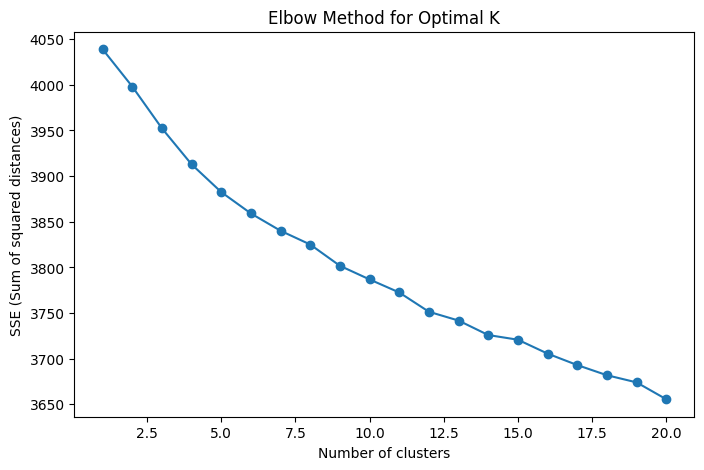

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1,21)
sse = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_array)
    sse.append(kmeans.inertia_)
    
# 엘보우 그래프
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()

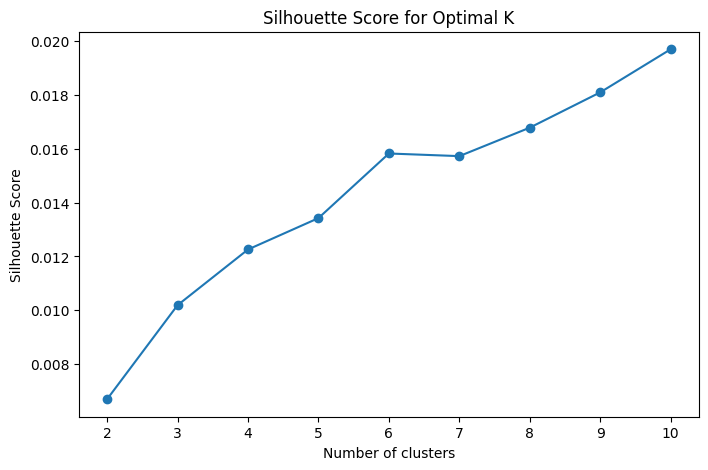

In [66]:
from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정 (2부터 10까지)
silhouette_scores = []

# 각 클러스터 개수에 대해 K-Means 모델 학습 및 실루엣 점수 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array)
    silhouette_avg = silhouette_score(tfidf_array, clusters)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [105]:
top_n = 10  # 클러스터당 상위 키워드 개수
clusters_top_keywords = {}

for cluster_num in range(num_clusters):
    cluster_docs = tfidf_df[fraud_df['클러스터'] == cluster_num]  # 해당 클러스터의 문서들
    top_keywords = cluster_docs.sum().sort_values(ascending=False).head(top_n).index
    clusters_top_keywords[cluster_num] = top_keywords

# 각 클러스터에서 추출된 상위 키워드를 확인
for cluster, keywords in clusters_top_keywords.items():
    print(f"클러스터 {cluster}의 상위 키워드: {keywords}")

클러스터 0의 상위 키워드: Index(['등기', '토지', '부동산', '매매', '계약', '소유권', '분양', '이전', '근저당권', '대금'], dtype='object')
클러스터 1의 상위 키워드: Index(['회사', '주식', '주식회사', '자금', '대출', '거래', '투자', '사업', '증권', '계좌'], dtype='object')
클러스터 2의 상위 키워드: Index(['포탈', '신고', '세액', '부과', '소득', '계산서', '세금', '부가가치세', '조세', '과세'], dtype='object')
클러스터 3의 상위 키워드: Index(['보험', '계약', '보험금', '회사', '손해', '보험사', '지급', '가입', '보증', '보험료'], dtype='object')
클러스터 4의 상위 키워드: Index(['위조', '행사', '사문서', '문서', '공문서', '형법', '판시', '변조', '명의', '사죄'], dtype='object')
클러스터 5의 상위 키워드: Index(['형법', '징역', '형사소송법', '판시', '사기', '송달', '사기죄', '상습', '감호', '경합'], dtype='object')
클러스터 6의 상위 키워드: Index(['지급', '계약', '채권', '신청', '회사', '공사', '사기죄', '거래', '의사', '대금'], dtype='object')
클러스터 7의 상위 키워드: Index(['수표', '어음', '발행', '약속어음', '지급', '할인', '액면', '당좌', '부정수표단속법', '교부'], dtype='object')


In [124]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = "AppleGothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

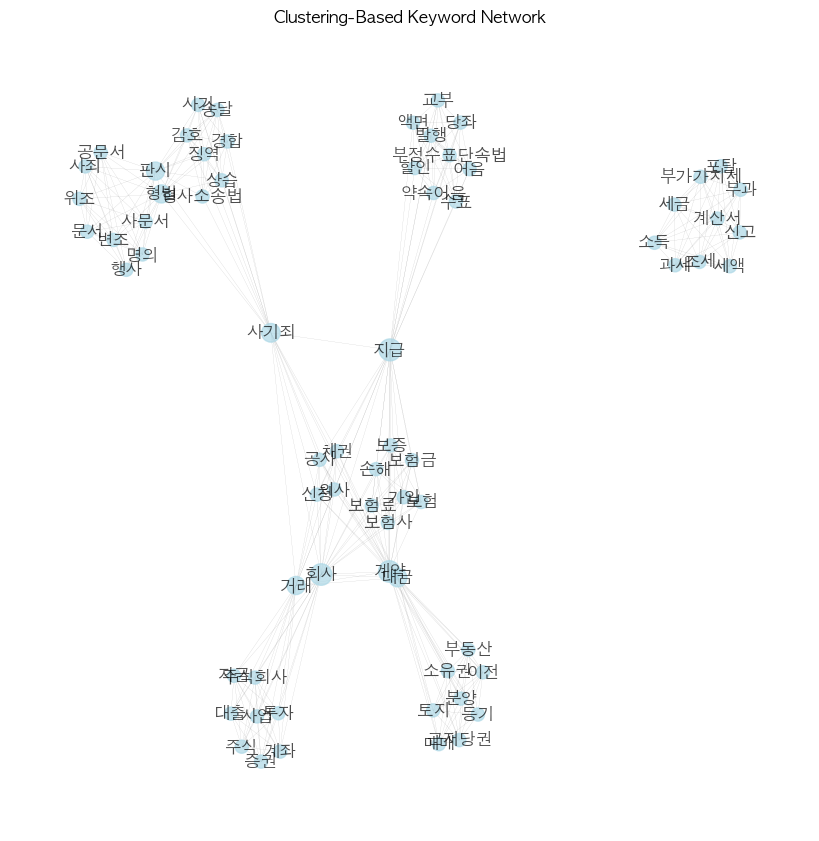

In [107]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

# 네트워크 그래프 생성
G = nx.Graph()

# 클러스터별 키워드를 노드로 추가하고, 키워드 간 엣지 설정
for cluster, keywords in clusters_top_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)  # 노드 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])  # 엣지 추가

# 노드 라벨 설정
for node in G.nodes():
    G.nodes[node]['label'] = node  # 노드 이름을 라벨로 설정

# 레이아웃 설정 (스프링 레이아웃)
pos = nx.spring_layout(G, k=0.3)  # k 값 조절하여 노드 간 간격 조절

# 노드 크기 설정 (degree를 기반으로)
node_sizes = [d for n, d in G.degree()]

# 시각화
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],  # 윈도우즈에서는 한글 폰트 사용
        node_size=[d * 10 for d in node_sizes],  # 노드 크기 조절
        node_color='lightblue',
        alpha=0.7,  # 노드 투명도
        width=0.1,  # 선 두께
        edge_color='gray')
plt.title('Clustering-Based Keyword Network')
plt.show()

## 연결 노드 중심성

In [131]:
degree_centrality = nx.degree_centrality(G)
print("연결 중심성 상위 노드:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=False)[:10])

연결 중심성 상위 노드: [('판시', 0.00980392156862745), ('형사소송법', 0.00980392156862745), ('오해', 0.00980392156862745), ('공소', 0.00980392156862745), ('사기', 0.00980392156862745), ('신청', 0.00980392156862745), ('행사', 0.00980392156862745), ('징역', 0.00980392156862745), ('채증', 0.00980392156862745), ('의사', 0.00980392156862745)]


In [137]:
# 특정 노드를 중심으로 레벨별 단어를 저장할 딕셔너리
target_node = "등기"  # 기준 노드 (원하는 키워드로 변경 가능)
levels = {1: [], 2: [], 3: [], 4: []}

# 각 노드와 '등기' 사이의 최단 거리 계산하여 레벨별로 정리
for node in G.nodes():
    if node != target_node:  # 자신을 제외한 다른 노드만 포함
        try:
            distance = nx.shortest_path_length(G, source=target_node, target=node)
            if 1 <= distance <= 4:
                levels[distance].append(node)
        except nx.NetworkXNoPath:
            # '등기'와 연결이 없는 노드 예외 처리
            pass

# 레벨별 단어 리스트 출력
for level, words in levels.items():
    print(f"Level {level}:", words)

Level 1: ['토지', '부동산', '매매']
Level 2: ['지급', '계약', '명의', '대금', '소유권', '분양', '이전', '근저당권', '임야', '매도', '설정', '담보', '매수', '건물', '채무', '아파트']
Level 3: ['사기죄', '보험', '손해', '보험사', '가입', '보증', '보험료', '의무', '자동차', '화재', '할부', '입원', '상해', '치료', '고의', '고지', '진료', '주식회사', '어음']
Level 4: ['형법', '위조', '형사소송법', '오해', '공소', '사기', '신청', '행사', '징역', '채증', '의사', '교부', '차용', '경합', '허위', '재산', '보험금', '회사', '대출', '자금', '거래', '투자', '은행', '증권', '금융', '사업', '예금', '횡령', '대표이사', '수표', '할인', '액면', '당좌', '부정수표단속법', '유가', '배서', '기일', '부도', '지인']


In [138]:
# 연결 중심성 계산
degree_centrality = nx.degree_centrality(G)

# 기준 노드의 중심성 값
target_node = "토지"
target_centrality = degree_centrality[target_node]

# 특정 노드를 중심으로 레벨별 단어를 저장할 딕셔너리
levels = {1: [], 2: [], 3: [], 4:[]}

# 각 노드와 '토지' 사이의 최단 거리 계산하여 레벨별로 정리
for node in G.nodes():
    if node != target_node and degree_centrality[node] <= target_centrality:  # 중심성이 낮거나 같은 노드만 포함
        try:
            distance = nx.shortest_path_length(G, source=target_node, target=node)
            if 1 <= distance <= 4:
                levels[distance].append(node)
        except nx.NetworkXNoPath:
            # '토지'과 연결이 없는 노드 예외 처리
            pass

# 레벨별 단어 리스트 출력
for level, words in levels.items():
    print(f"Level {level}:", words)

Level 1: ['지급', '명의', '대금', '등기', '소유권', '분양', '이전', '근저당권', '임야', '매도', '설정', '담보', '매수', '건물', '채무', '아파트']
Level 2: ['보험', '손해', '보험사', '가입', '보증', '보험료', '의무', '자동차', '화재', '할부', '입원', '상해', '치료', '고의', '고지', '진료', '주식회사', '부동산', '매매', '어음']
Level 3: ['형법', '위조', '형사소송법', '오해', '공소', '사기', '신청', '행사', '징역', '채증', '의사', '교부', '차용', '경합', '허위', '재산', '보험금', '회사', '대출', '자금', '거래', '투자', '은행', '증권', '금융', '사업', '예금', '횡령', '대표이사', '수표', '할인', '액면', '당좌', '부정수표단속법', '유가', '배서', '기일', '부도', '지인']
Level 4: ['판시', '주식', '계좌', '약속어음', '발행']


In [113]:
## 트리구조로보기
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for cluster, keywords in cluster_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])

In [139]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"노드 수: {num_nodes}, 엣지 수: {num_edges}")

노드 수: 103, 엣지 수: 114


In [140]:
degree_centrality = nx.degree_centrality(G)
print("연결 중심성 상위 노드:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

연결 중심성 상위 노드: [('계약', 0.19607843137254902), ('사기죄', 0.1764705882352941), ('신고', 0.16666666666666666), ('주식회사', 0.16666666666666666), ('토지', 0.16666666666666666), ('어음', 0.16666666666666666), ('지급', 0.049019607843137254), ('회사', 0.049019607843137254), ('형법', 0.029411764705882353), ('포탈', 0.029411764705882353)]


In [141]:
closeness_centrality = nx.closeness_centrality(G)
print("클로즈 중심성 상위 노드:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

클로즈 중심성 상위 노드: [('계약', 0.4019607843137255), ('지급', 0.39473993190090406), ('사기죄', 0.36827691970643006), ('어음', 0.34334150326797386), ('토지', 0.33633453381352546), ('주식회사', 0.33462725191599485), ('회사', 0.2969440028263558), ('보험', 0.29561241536973537), ('채무', 0.29561241536973537), ('보증', 0.2891296869625043)]


In [142]:
betweenness_centrality = nx.betweenness_centrality(G)
print("중개 중심성 상위 노드:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

중개 중심성 상위 노드: [('계약', 0.28210179561373533), ('사기죄', 0.2387346577795034), ('토지', 0.21582371122266306), ('어음', 0.21195545324840603), ('주식회사', 0.17839747560190175), ('지급', 0.11155223365473786), ('회사', 0.05209868325768147), ('신고', 0.032615026208503206), ('등기', 0.031256066783148906), ('수표', 0.031256066783148906)]


In [143]:
density = nx.density(G)
print(f"네트워크 밀도: {density:.2f}")

네트워크 밀도: 0.02


In [144]:
# Louvain 알고리즘의 의미
# Louvain 알고리즘은 네트워크에서 밀접하게 연결된 노드 그룹을 찾는 데 유용합니다. 
# 이러한 커뮤니티는 네트워크 구조의 중요한 정보나 특성을 반영할 수 있어, 
# 소셜 네트워크 분석, 추천 시스템, 생물학적 네트워크 등에서 자주 사용됩니다.
from community import community_louvain

communities = community_louvain.best_partition(G)
print("커뮤니티 할당:", communities)

커뮤니티 할당: {'형법': 1, '사기죄': 1, '판시': 1, '위조': 1, '형사소송법': 1, '지급': 2, '오해': 1, '공소': 1, '사기': 1, '신청': 1, '계약': 3, '행사': 1, '징역': 1, '채증': 1, '의사': 1, '교부': 6, '차용': 1, '경합': 1, '허위': 1, '재산': 1, '포탈': 5, '신고': 5, '세액': 5, '부과': 5, '소득': 5, '계산서': 5, '세금': 5, '부가가치세': 5, '조세': 5, '과세': 5, '세법': 5, '국세': 5, '부정': 5, '법인세': 5, '징수': 5, '과세표준': 5, '매출': 5, '납부': 5, '공급': 5, '법인': 5, '보험': 0, '보험금': 0, '회사': 0, '손해': 3, '보험사': 3, '가입': 3, '보증': 2, '보험료': 3, '의무': 3, '자동차': 3, '화재': 3, '할부': 3, '입원': 3, '상해': 3, '치료': 3, '고의': 3, '고지': 3, '진료': 3, '주식회사': 2, '주식': 0, '계좌': 0, '대출': 2, '자금': 2, '거래': 2, '투자': 2, '은행': 2, '명의': 4, '증권': 6, '금융': 2, '사업': 2, '예금': 2, '대금': 4, '횡령': 2, '대표이사': 2, '등기': 4, '토지': 4, '부동산': 4, '매매': 4, '소유권': 4, '분양': 4, '이전': 4, '근저당권': 4, '임야': 4, '매도': 4, '설정': 4, '담보': 4, '매수': 4, '건물': 4, '채무': 6, '아파트': 4, '수표': 6, '어음': 6, '약속어음': 6, '발행': 6, '할인': 6, '액면': 6, '당좌': 6, '부정수표단속법': 6, '유가': 6, '배서': 6, '기일': 6, '부도': 6, '지인': 6}


/opt/homebrew/Caskroom/miniconda/base/envs/NoF/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


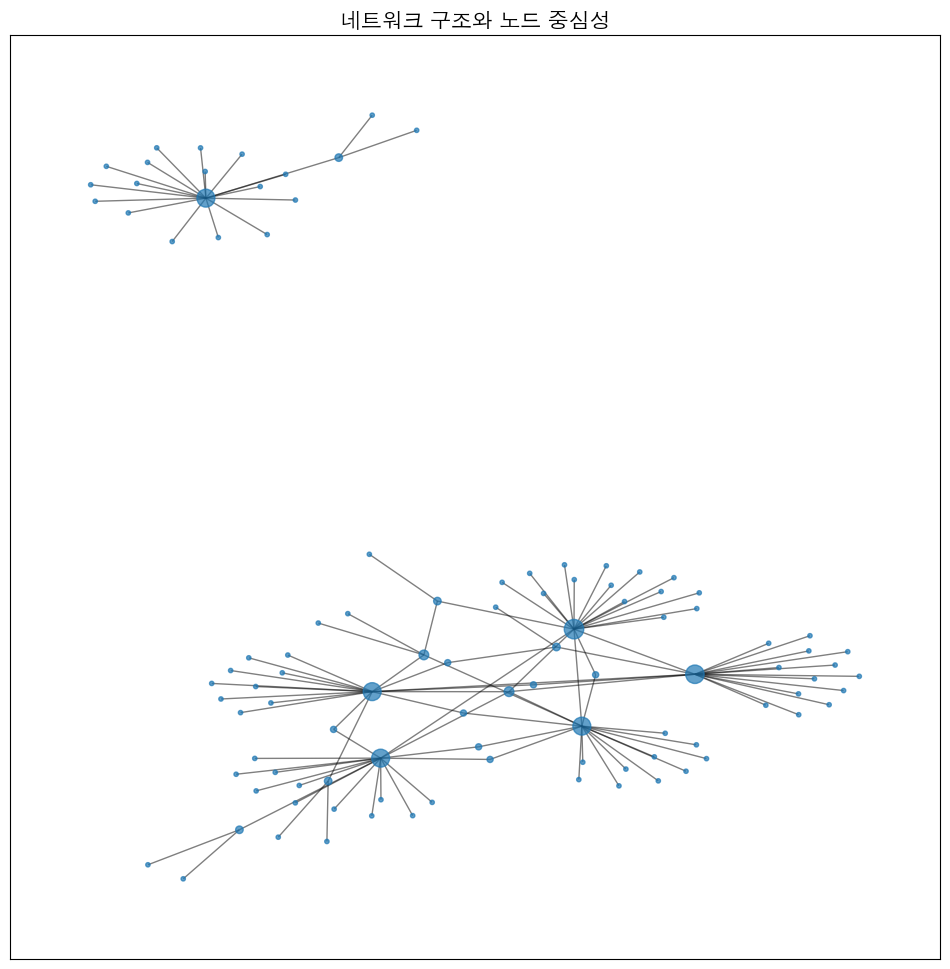

In [146]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

# 한글 깨짐 방지
plt.rcParams['font.family'] = "AppleGothic"
# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 네트워크 시각화
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in degree_centrality.values()], cmap=plt.cm.Reds, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("네트워크 구조와 노드 중심성", fontsize=15)  # 타이틀에 폰트 적용
plt.show()

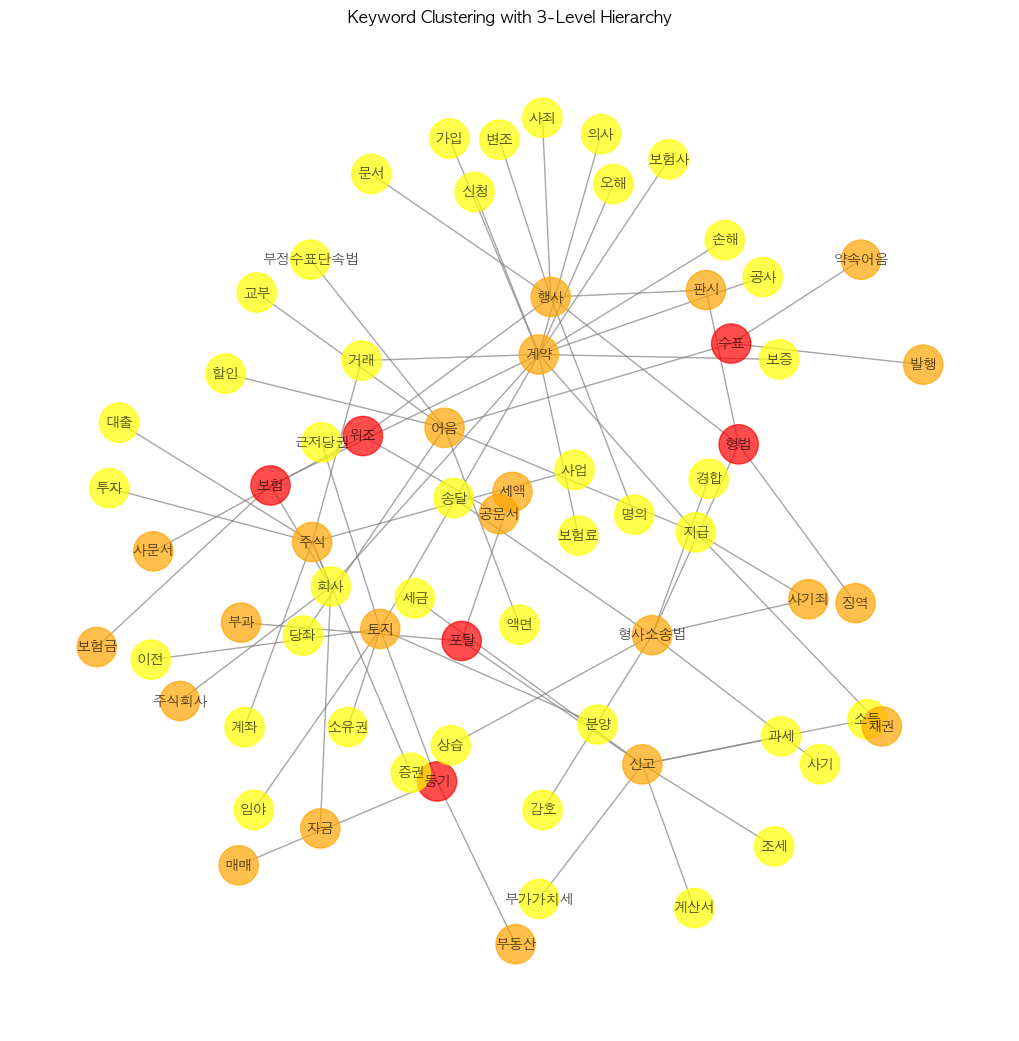

In [148]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# TF-IDF 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# TF-IDF 벡터화 수행
tfidf_array = vectorizer.fit_transform(fraud_df['판례내용_이유(불용어제거)'])
feature_names = vectorizer.get_feature_names_out()  # TF-IDF에서 사용된 키워드 목록

# K-Means 클러스터링 설정 및 수행
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_array)
labels = kmeans.labels_

# 클러스터별 주요 키워드 추출 (상위, 중위, 하위)
cluster_keywords = {}
for i in range(num_clusters):
    cluster_indices = (labels == i)
    tfidf_cluster = tfidf_array[cluster_indices].mean(axis=0).A1  # numpy 배열을 1차원으로 변환
    sorted_keywords = [feature_names[idx] for idx in tfidf_cluster.argsort()[::-1]]
    cluster_keywords[f'Cluster {i+1}'] = sorted_keywords[:10]  # 클러스터별 상위 10개 키워드

# 네트워크 그래프 생성 및 레벨 구분
G = nx.Graph()
for cluster, keywords in cluster_keywords.items():
    # 상위 레벨: 가장 중심이 되는 키워드
    G.add_node(keywords[0], level=1, cluster=cluster)
    
    # 2레벨 키워드 연결
    for keyword in keywords[1:4]:
        G.add_node(keyword, level=2, cluster=cluster)
        G.add_edge(keywords[0], keyword)
    
    # 3레벨 키워드 연결
    for keyword in keywords[4:]:
        G.add_node(keyword, level=3, cluster=cluster)
        G.add_edge(keywords[1], keyword)  # 2레벨 키워드에 연결

# 노드 색상 설정 (레벨별 구분)
node_colors = []
for node in G.nodes(data=True):
    if node[1]['level'] == 1:
        node_colors.append('red')  # 상위 레벨
    elif node[1]['level'] == 2:
        node_colors.append('orange')  # 중간 레벨
    else:
        node_colors.append('yellow')  # 하위 레벨

# 레이아웃 및 시각화 설정
pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color='gray', alpha=0.7, font_size=10, font_family='AppleGothic')
plt.title("Keyword Clustering with 3-Level Hierarchy")
plt.show()

## LDA

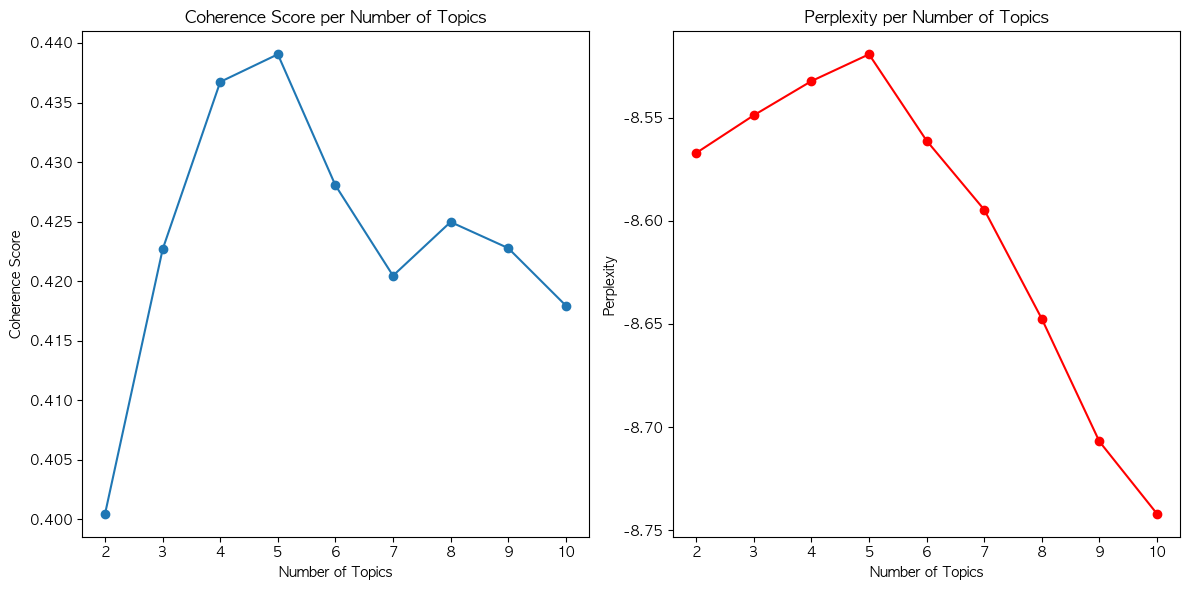

최적의 토픽 개수: 5


In [159]:
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 준비 및 토큰화
texts = [doc.split() for doc in fraud_df['판례내용_이유(불용어제거)']]

# gensim의 Dictionary와 Corpus 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# 최적의 토픽 수 찾기 함수 정의
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    perplexity_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        model_list.append(model)
        
        # Coherence Score 계산
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        
        # Perplexity 계산
        perplexity_values.append(model.log_perplexity(corpus))
    
    return model_list, coherence_values, perplexity_values

# 토픽 개수 설정 범위
start, limit, step = 2, 11, 1  # 예: 2에서 11까지 1씩 증가

# 최적의 토픽 수 찾기
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary, corpus, texts, start, limit, step)

# Coherence Score와 Perplexity 그래프 그리기
x = range(start, limit, step)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score per Number of Topics")

plt.subplot(1, 2, 2)
plt.plot(x, perplexity_values, marker='o', color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity per Number of Topics")

plt.tight_layout()
plt.show()

# 최적의 토픽 개수 선택
optimal_topic_count = x[coherence_values.index(max(coherence_values))]
print(f"최적의 토픽 개수: {optimal_topic_count}")


In [161]:
# 토픽수 5개
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer로 단어 빈도 행렬 생성
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 불용어 제거 설정
X = vectorizer.fit_transform(fraud_df['판례내용_이유(불용어제거)'])

# LDA 모델 생성 및 학습
n_topics = 5  # 원하는 토픽 개수
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# 주제별 상위 단어 출력
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\n주제 {idx + 1}:")
    print([terms[i] for i in topic.argsort()[:-10 - 1:-1]])  # 상위 10개 단어 출력



주제 1:
['보험', '계약', '신고', '회사', '포탈', '법인', '지급', '소득', '부과', '사업']

주제 2:
['지시', '지원', '대통령', '공무원', '보고', '직무', '순번', '사업', '수사', '행사']

주제 3:
['회사', '주식회사', '주식', '자금', '대출', '거래', '사업', '계좌', '명의', '저축은행']

주제 4:
['계약', '지급', '토지', '매매', '분양', '등기', '부동산', '대금', '채권', '의무']

주제 5:
['회사', '지급', '직원', '정보', '병원', '운영', '기관', '의료', '판매', '제공']


In [169]:
# 토픽수 8개, countvectorize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer로 단어 빈도 행렬 생성
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 불용어 제거 설정
X = vectorizer.fit_transform(fraud_df['판례내용_이유(불용어제거)'])

# LDA 모델 생성 및 학습
n_topics = 8  # 원하는 토픽 개수
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# 주제별 상위 단어 출력
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\n주제 {idx + 1}:")
    print([terms[i] for i in topic.argsort()[:-10 - 1:-1]])  # 상위 10개 단어 출력



주제 1:
['공사', '지급', '대금', '신용장', '은행', '교부', '판시', '회사', '사업', '서류']

주제 2:
['지원', '행사', '순번', '지시', '사업', '위조', '배제', '오해', '형사소송법', '보고']

주제 3:
['대출', '주식회사', '저축은행', '사업', '회사', '자금', '계좌', '명의', '형법', '지급']

주제 4:
['계약', '매매', '토지', '등기', '분양', '부동산', '지급', '이전', '소유권', '대금']

주제 5:
['정보', '이용', '판매', '직원', '활동', '제공', '거래', '계정', '계산서', '세금']

주제 6:
['보험', '계약', '지급', '금액', '신고', '부과', '소득', '회사', '손해', '의무']

주제 7:
['회사', '주식회사', '주식', '거래', '자금', '그룹', '증권', '법인', '투자', '사업']

주제 8:
['병원', '기관', '의료', '수사', '직무', '조사', '입원', '지급', '공무원', '경찰']


In [168]:
# 토픽수 8개, tfidf vectorize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer로 TF-IDF 행렬 생성
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)  # 불용어 제거 설정
X = vectorizer.fit_transform(fraud_df['판례내용_이유(불용어제거)'])

# LDA 모델 생성 및 학습
n_topics = 8  # 원하는 토픽 개수
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# 주제별 상위 단어 출력
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\n주제 {idx + 1}:")
    print([terms[i] for i in topic.argsort()[:-10 - 1:-1]])  # 상위 5개 단어 출력



주제 1:
['원목', '비누', '신기한', '대우건설', '벌채', 'ims', '한의학', '발산', '진미', '온도계']

주제 2:
['감호', '보호감호', '호법', '재범', '화물자동차', '옵션계약', '굴비', '회보', '계불', '계원']

주제 3:
['의료', '의료법', '환자', '의료인', '필로폰', '입원', '진료', '의료행위', '군사', '화약류']

주제 4:
['녹용', '적격성', '공중위생', '이광수', '군법무관', '미용', '저작권', '배자', '보육', '밀가루']

주제 5:
['급수', '조례', '과태료', '하수도', '포화', '외환카드', '종친회', '홍완희', '양수기', '원아']

주제 6:
['회사', '계약', '지급', '보험', '주식회사', '매매', '명의', '형법', '등기', '토지']

주제 7:
['영양사', '신행', '거부권', '윤전기', 'ktpi', '작품', '난민', '조경', '신정아', '이프']

주제 8:
['한상철', '염산', '예천군', '성병', '응급의료', '순례', '서화', '김기영', '전염병', '페트']


In [164]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize

# 토큰화 (각 문서를 단어 리스트로 변환)
texts = [word_tokenize(doc) for doc in fraud_df['판례내용_이유(불용어제거)']]

# gensim의 Dictionary와 Corpus 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성 및 학습
n_topics = 8  # 원하는 토픽 개수
lda_model = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42)

# 주제별 상위 단어 출력
for idx, topic in lda_model.show_topics(formatted=False, num_words=10):
    print(f"\n주제 {idx + 1}:")
    print(f"topic {idx}: {topic}")



주제 1:
topic 0: [('계약', 0.027168361), (',', 0.013438029), ('보험', 0.010939623), ('지급', 0.008791202), ('매매', 0.008707609), (')', 0.0068218396), ('등기', 0.0059627956), ('의무', 0.0059406837), ('회사', 0.005790814), ('취소', 0.0053466563)]

주제 2:
topic 1: [('회사', 0.018838765), (',', 0.01867086), ('주식회사', 0.012835554), ('주식', 0.009421787), ('지급', 0.008408537), (')', 0.008192168), ('거래', 0.007960861), ('증권', 0.005460422), ('은행', 0.005378091), ('계약', 0.0048542693)]

주제 3:
topic 2: [(',', 0.018646779), ('회사', 0.014297182), (')', 0.010303356), ('계좌', 0.008834667), ('.', 0.006426798), ('거래', 0.00613519), ('명의', 0.005946705), ('자금', 0.0048381803), ('주식', 0.004374603), ('지급', 0.004176179)]

주제 4:
topic 3: [(',', 0.015179929), (')', 0.006260834), ('주식회사', 0.0055825794), ('회사', 0.004638207), ('.', 0.004307902), ('검찰', 0.0035103634), ('포탈', 0.0034273), ('사업', 0.00306537), ('신고', 0.0030024906), ('직원', 0.0029924815)]

주제 5:
topic 4: [(',', 0.02076907), ('회사', 0.010988165), (')', 0.0107001765), ('등기', 0.006101

## LDA 결과는 sklearn의 lda 사용, 토픽개수 8  

주제 1: 공사 대금 및 금융 거래  
주요 단어: 공사, 지급, 대금, 신용장, 은행, 교부, 판시, 회사, 사업, 서류  
설명: 이 주제는 공사 대금 지급, 은행 신용장 발급 및 교부와 관련된 내용입니다. 주요 단어들이 공사와 은행 관련 서류들로 이루어져 있어, 공사와 관련된 금융 거래 및 서류 처리를 다루는 주제입니다.  

주제 2: 행정 지원 및 공무원 직무 수행  
주요 단어: 지원, 행사, 순번, 지시, 사업, 위조, 배제, 오해, 형사소송법, 보고  
설명: 이 주제는 공무원의 직무 수행, 지원 행사, 형사 소송 과정 등을 포함합니다. 행정 업무와 관련된 직무 수행 및 형사소송법에 대한 내용이 주된 것으로 보입니다.  

주제 3: 회사 대출 및 금융 자금 관리  
주요 단어: 대출, 주식회사, 저축은행, 사업, 회사, 자금, 계좌, 명의, 형법, 지급  
설명: 이 주제는 회사 자금 운용, 대출 및 저축은행과의 거래, 자금 관리와 같은 기업 금융과 대출 관리와 관련된 내용을 다루고 있습니다. 회사의 자금 운용 및 금융 관련 법적 절차로 해석할 수 있습니다.  

주제 4: 부동산 계약 및 소유권 이전  
주요 단어: 계약, 매매, 토지, 등기, 분양, 부동산, 지급, 이전, 소유권, 대금  
설명: 부동산 매매 계약, 등기 및 소유권 이전, 분양과 같은 부동산 거래와 관련된 내용입니다. 부동산 거래와 계약 절차에 관한 주제입니다.  

주제 5: 정보 활용 및 판매 거래  
주요 단어: 정보, 이용, 판매, 직원, 활동, 제공, 거래, 계정, 계산서, 세금  
설명: 정보의 이용과 판매, 거래, 세금 계산서 발행 등과 관련된 내용입니다. 정보 제공 및 판매 거래와 관련된 세금 문제를 다루는 주제로 볼 수 있습니다.  

주제 6: 보험 및 세금 관련 계약  
주요 단어: 보험, 계약, 지급, 금액, 신고, 부과, 소득, 회사, 손해, 의무  
설명: 보험 계약, 보험금 지급, 세금 부과 및 신고와 관련된 주제입니다. 보험 계약과 세무 신고와 관련된 주제로 볼 수 있습니다.  

주제 7: 주식 거래 및 투자  
주요 단어: 회사, 주식회사, 주식, 거래, 자금, 그룹, 증권, 법인, 투자, 사업  
설명: 이 주제는 주식 거래, 투자, 증권 관련 용어가 포함되어 있어 주식 거래와 기업 투자에 관한 내용을 다루고 있습니다. 회사와 관련된 주식 및 투자 활동에 대한 주제입니다.  

주제 8: 의료 기관 및 공무원 직무  
주요 단어: 병원, 기관, 의료, 수사, 직무, 조사, 입원, 지급, 공무원, 경찰  
설명: 병원과 의료기관의 운영, 공무원의 직무, 수사 및 경찰 조사와 관련된 용어가 포함되어 있습니다. 의료기관의 운영 및 공공 수사와 관련된 주제로 볼 수 있습니다.  

In [170]:
## 클러스터링과 lda 비교시 클러스터링으로 라벨링하는게 더 적합

In [171]:
fraud_df['클러스터'].value_counts()

클러스터
7    1910
1     601
6     575
2     352
3     250
5     231
8     139
4     124
Name: count, dtype: int64

In [174]:
len(fraud_df[fraud_df['클러스터']==1])

601

In [193]:
cluster_list

{1: ['등기', '토지', '부동산', '매매', '계약', '소유권', '분양', '이전', '근저당권', '임야'],
 2: ['회사', '주식', '주식회사', '자금', '대출', '거래', '투자', '사업', '계좌', '증권'],
 3: ['포탈', '신고', '세액', '부과', '소득', '세금', '계산서', '부가가치세', '조세', '과세'],
 4: ['보험', '계약', '보험금', '회사', '손해', '보험사', '지급', '가입', '보증', '보험료'],
 5: ['위조', '행사', '사문서', '공문서', '문서', '형법', '판시', '명의', '변조', '사죄'],
 6: ['형법', '형사소송법', '징역', '판시', '사기죄', '상습', '사기', '송달', '감호', '경합'],
 7: ['지급', '계약', '사기죄', '채권', '신청', '회사', '공사', '의사', '오해', '거래'],
 8: ['수표', '어음', '발행', '약속어음', '지급', '할인', '액면', '당좌', '부정수표단속법', '교부']}

In [194]:
fraud_df['키워드'] = fraud_df['클러스터'].map(cluster_list)

In [195]:
fraud_df[['클러스터','키워드']].head()

,클러스터,키워드
0,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
1,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
2,4,"[보험, 계약, 보험금, 회사, 손해, 보험사, 지급, 가입, 보증, 보험료]"
3,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
4,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"


In [196]:
fraud_df.to_csv('data/df_fraud_keyword.csv', index=False)

In [197]:
fraud_df.head()

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크,판례정보일련번호,선고,판결유형,...,판결요지,참조조문,참조판례,판례내용,판례내용_상단,판례내용_이유,판례내용_이유(전처리),판례내용_이유(불용어제거),클러스터,키워드
0,241201,아동·청소년의성보호에관한법률위반(음란물제작·배포등)·성폭력범죄의처벌등에관한특례법위반...,2021도1181,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241201,선고,판결,...,형사소송법 제215조 제1항은 ‘범죄수사에 필요한 때에는 피의자가 죄를 범하였다고 ...,"형사소송법 제106조 제1항, 제3항, 제4항, 제121조, 제215조, 제218조...","대법원 2022. 1. 27. 선고 2021도11170 판결(공2022상, 486)...",【피 고 인】 피고인【상 고 인】 검사【변 호 인】 법무법인 비엘에스 담당변호사 장...,【피 고 인】 피고인【상 고 인】 검사【변 호 인】 법무법인 비엘에스 담당변호사 장...,"【이 유】 상고이유를 판단한다. 1. 원심 판시 범죄일람표 제1 내지 5,...","{'이유': '상고이유를 판단한다. 1. 원심 판시 범죄일람표 제1 내지 5, 7,...",판시 일람표 서부 발부 압수 수색 검증 영장 영장 기하 압수 저장매체 탐색 출력 복...,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
1,241251,특정경제범죄가중처벌등에관한법률위반(사기)[국민참여재판으로 진행된 제1심에서 배심원 ...,2020도7802,2024.07.25,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241251,선고,판결,...,"배심원이 참여하는 형사재판, 즉 국민참여재판을 거쳐 제1심법원이 배심원의 만장일치...","형사소송법 제266조의5, 제266조의6, 제266조의7, 제266조의8, 제266...","대법원 2005. 3. 11. 선고 2004도8313 판결, 대법원 2010. 3....",【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인(유한) 바른 담당변호...,【피 고 인】 피고인【상 고 인】 피고인【변 호 인】 법무법인(유한) 바른 담당변호...,【이 유】 상고이유를 판단한다. 1. 공소사실의 요지 및 원심의 판단 가...,{'이유': '상고이유를 판단한다. 1. 공소사실의 요지 및 원심의 판단 가. 공소...,화물 트럭 구입 구입 돌려줄 의사 수익 좋은 유망 물류 사업 화물 트럭 가량 구매 ...,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
2,241189,보험사기방지특별법위반,2023노878,2024.07.04,제주지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241189,선고,판결 : 상고,...,甲이 자신의 아들인 乙을 피보험자로 하여 화재보험회사인 피해자 회사의 실손 의료...,"보험사기방지 특별법 제2조 제1호, 제8조 제1항 제1호, 구 도로교통법(2020....",NaN,【피 고 인】 피고인【항 소 인】 피고인【검 사】 윤인식 외 1인【변 호 인】...,【피 고 인】 피고인【항 소 인】 피고인【검 사】 윤인식 외 1인【변 호 인】...,【이 유】 1. 항소이유의 요지: 사실오인 및 법리오해 이 사건은 보험약관...,{'이유': '1. 항소이유의 요지: 사실오인 및 법리오해 이 사건은 보험약관에서 ...,오인 오해 보험 보험금 지급 제한 상해 원인 보드 다가 넘어져 다침 단순히 넘어져서...,4,"[보험, 계약, 보험금, 회사, 손해, 보험사, 지급, 가입, 보증, 보험료]"
3,240943,사기미수·도시및주거환경정비법위반[소송비용액확정결정신청의 소송비용액계산서에 실제 지출...,2021도2340,2024.06.27,대법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,240943,선고,판결,...,소송비용부담의 재판은 소송비용상환의무의 존재를 확정하고 그 지급을 명하는 데 그...,"형법 제347조, 민사소송법 제110조 제1항, 제2항<br/>","대법원 2006. 10. 12. 선고 2004재다818 판결(공2006하, 1875...",【피 고 인】 피고인 1 외 1인【상 고 인】 피고인들【변 호 인】 변호사 이형주 ...,【피 고 인】 피고인 1 외 1인【상 고 인】 피고인들【변 호 인】 변호사 이형주 ...,【이 유】 상고이유를 판단한다. 1. 피고인 1에 대한 부분 가. 공소사...,{'이유': '상고이유를 판단한다. 1. 피고인 1에 대한 부분 가. 공소사실의 요...,북부 카합 임시 총회 개최 금지 가처분 카확 카합 임시 총회 금지 가처분 카확 소송...,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
4,241423,사기·마약류관리에관한법률위반(향정)·주민등록법위반,2023고단2401,2024.05.08,서울북부지방법원,형사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...,241423,선고,판결 : 항소,...,"피고인이 인터넷에 필로폰, 졸피뎀 등 마약류 판매 광고글을 게시하여 마약류를 매...","마약류 관리에 관한 법률 제3조 제12호 (나)목, 제4조 제1항 제1호, 제62조...",NaN,【피 고 인】 피고인【검 사】 박동준 외 2인【변 호 인】 법무법인 북부 담당...,【피 고 인】 피고인【검 사】 박동준 외 2인【변 호 인】 법무법인 북부 담당...,【이 유】【범죄사실】 1. 마약류 관리에 관한 법률 위반(향정) 누구든지 ...,{'이유': ''},마약 관리 향정 마약 매매 정보 널리 알리거나 제시 서는 된다 중순 대전 서구 주소...,7,"[지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래]"
